YOUR FULL NAME

 - Linh Tran

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Thursday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [12]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
#from sklearn.metrics import make_squared_error #(?)

import matplotlib.pyplot as plt
import seaborn as sns



In [17]:
np.random.seed(1)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 1 --> simple linear regression
                                   noise=30, 
                                   bias = bias, 
                                   random_state=1, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df

,x1,x2,x3,x4,x5,y
0,1.624345,-0.611756,-0.528172,-1.072969,0.865408,28.865495
1,-2.301539,1.744812,-0.761207,0.319039,-0.249370,4.937580
2,1.462108,-2.060141,-0.322417,-0.384054,1.133769,-39.935140
3,-1.099891,-0.172428,-0.877858,0.042214,0.582815,-49.524568
4,-1.100619,1.144724,0.901591,0.502494,0.900856,244.382026
...,...,...,...,...,...,...
295,-0.081570,1.529248,0.686483,1.717089,-0.804277,343.244347
296,0.300254,-0.429596,0.805913,-0.219552,-0.251852,20.913333
297,-1.326490,0.308204,1.115489,1.008196,-3.016032,-8.753043
298,-1.619646,2.005141,-0.187626,-0.148941,1.165335,182.614426


MSE: 1131.99
R²: 0.95
[44.166675   80.03255319 90.51428891 86.13498446 67.48800688]
32.68084820747811


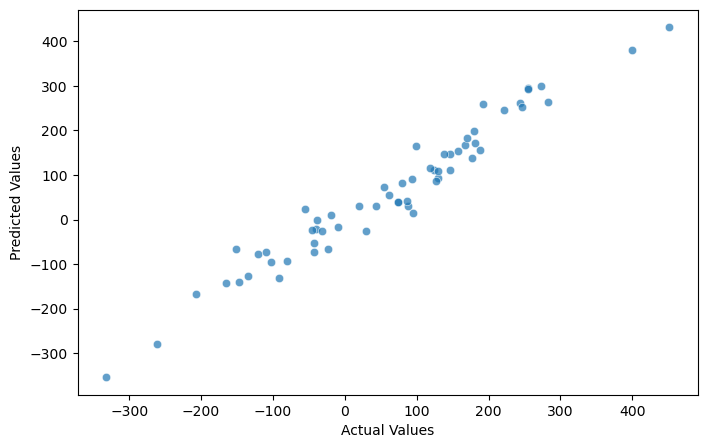

In [21]:
# Define Custom R² and MSE Calculations
calc_R2 = lambda y, y_hat: 1 - np.sum((y - y_hat)**2) / np.sum((y - np.mean(y))**2)
calc_MSE = lambda y, y_hat: np.mean((y - y_hat)**2)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Calculate MSE and R²
MSE = calc_MSE(y_test, y_pred)
R2 = calc_R2(y_test, y_pred)
print(f"MSE: {MSE:.2f}")
print(f"R²: {R2:.2f}")
print(model.coef_)
print(model.intercept_)

# Plot Actual vs. Predicted Values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


#### Your written answers here

What are your model parameters?
 - The model parameters are the coeficients: 44.166675; 80.03255319;  90.51428891;  86.13498446; 67.48800688; and intercept: 32.68084820747811

What were your MSE and R^2?
 - MSE: 1131.99 
 - R^2: 0.95



## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [23]:
np.random.seed(1)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=10,    # n_features = 1 --> simple linear regression
                                   noise=30, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 4,
                                   random_state=1, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y



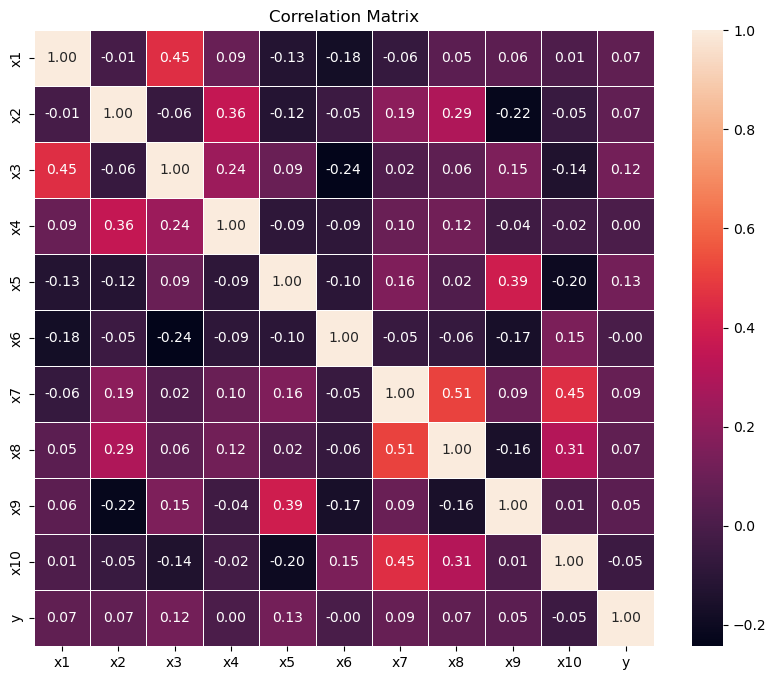

MSE: 1006.93
R²: -0.04
[100.54351296  68.09467682  39.08138322 -53.14977214  76.59451309
  62.1462408  111.41635577   2.41736139   0.64834276 -74.00176706]
32.67545906701269


In [27]:
# Show Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(reg2_df.corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Define R² and MSE
calc_R2 = lambda y, y_hat: 1 - np.sum((y - y_hat)**2) / np.sum((y - np.mean(y))**2)
calc_MSE = lambda y, y_hat: np.mean((y - y_hat)**2)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Calculate MSE and R²
MSE = calc_MSE(y_test, y_pred)
R2 = calc_R2(y_test, y_pred)

# Print Model Performance
print(f"MSE: {MSE:.2f}")
print(f"R²: {R2:.2f}")
print(model.coef_)
print(model.intercept_)

#### Your written answers here

What are your model parameters?
 - The model parameters are the coefficients and intercept above

Which features (x1, x2...) were significant? Which were co-linear?
 - x3 and x6 were significant.
 
What were your MSE and R^2?
 - MSE: 1006.93
 - R^2: -0.04



## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [28]:
housing_df = pd.read_csv('kc_house_data.csv')
housing_df.head()
#choose the feature with high correlation - price 

FileNotFoundError: [Errno 2] No such file or directory: 'kc_house_data.csv'

### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


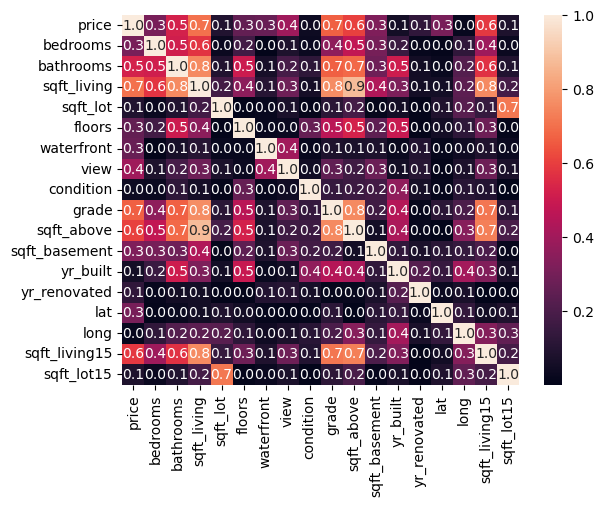

In [70]:

housing_df.drop(columns = ['id', 'date', 'zipcode'], inplace = True)
corr = housing_df.corr()
sns.heatmap(np.abs(corr), annot = True, fmt = '.1f')
plt.show()

In [63]:
print(corr['price'].max)

<bound method Series.max of price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64>


In [ ]:
y = housing_df['price']
X = housing_df['bathrooms', 'sqft_living', 'grade']


In [71]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
X_scaled_train = ss.transform(X_train)
X_scaled_test = ss.transform(X_test)
model_linreg = LinearRegression()
model_linreg.fit( X_scaled_train, y_train)

LinearRegression()

In [72]:
from sklearn.linear_model import Lasso, Ridge
y = housing_df['price']
X = housing_df['bathrooms', 'sqft_living', 'grade']

KeyError: ('bathrooms', 'sqft_living', 'grade')

#### Your written answers here
Which features are you using and why?
 
 - Your written answer here.

The features I use are 'bathroom', 'grade', and 'sqft_living', because they have the highest correlation with the housing price. 

### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

In [ ]:
# Your code here. Add cells as needed.


### Your written answers here
Which regression did you use?
 - Your answer

Does your regularized model look better than your MLR? How so?
 - Your answer

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>

In [ ]:
# Your code here. Add cells as needed.

 ### Your written answers here

 What are the $R^2$ for the two models?

  - Your answer
 
